<a href="https://colab.research.google.com/github/RJAbuNasser/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing Libraries**

In [13]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

**Inspecting Data**

In [3]:
zip_path = "Test and Actual.zip"
temp_dir = "temp_extracted"

if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(temp_dir)

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if file.endswith("10_full.xlsx") or file.endswith("20_full.xlsx"):
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            excel_data = pd.ExcelFile(file_path)
            for sheet_name in excel_data.sheet_names:
                print(f"Sheet: {sheet_name}")
                df = excel_data.parse(sheet_name)

                print(df.describe(include="all"))

                df.info()

Streaming output truncated to the last 5000 lines.
 20  109.353065  16 non-null     float64
 21  97.8747169  16 non-null     float64
 22  99.6679206  16 non-null     float64
 23  98.8949038  16 non-null     float64
 24  87.0094531  16 non-null     float64
 25  110.122655  16 non-null     float64
 26  111.494166  16 non-null     float64
 27  109.301589  16 non-null     float64
 28  114.714768  16 non-null     float64
 29  124.620183  16 non-null     float64
dtypes: float64(30)
memory usage: 3.9 KB
Sheet: Sheet5
          3990.20876     2480.30772     3244.02646     2900.80124  \
count      16.000000      16.000000      16.000000      16.000000   
mean     7282.453679   11296.815802   10102.472880    9098.773760   
std     25357.625017   42122.006608   36973.366611   33431.758344   
min         0.000000       0.000000       0.000000       0.000000   
25%        21.445198      40.589728      41.903871      32.525237   
50%       939.308042     529.514931     870.511573     765.730352   
7

**Visualizing Tallies**

Processing file: temp_extracted/Test and Actual/CEC3591/20-D/jSObinexpEig_20_full.xlsx
Sheet: Sheet1


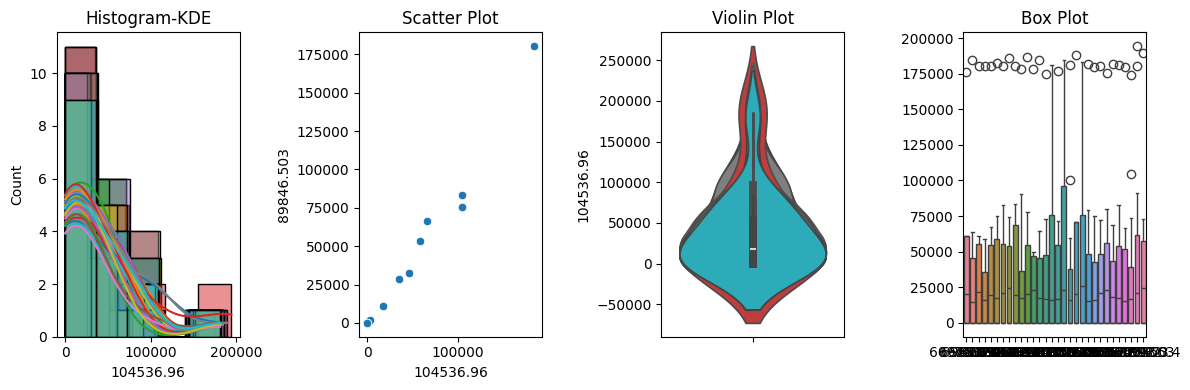

Sheet: Sheet2


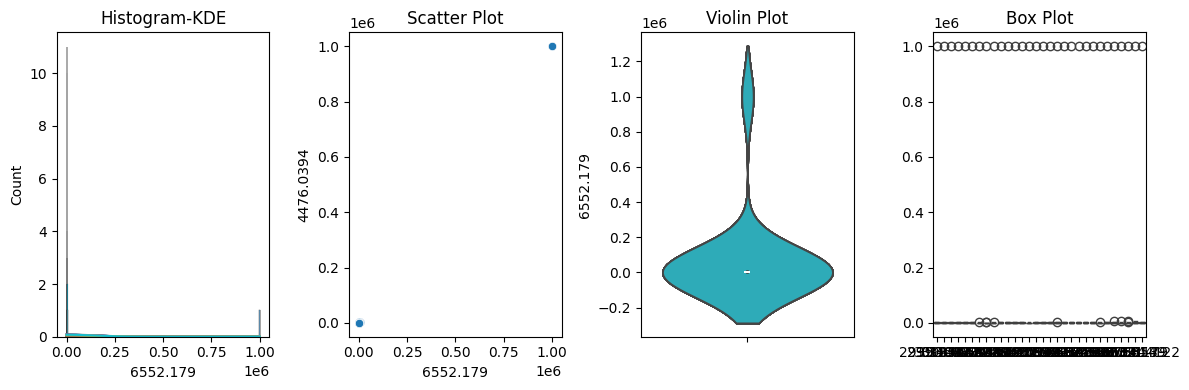

Sheet: Sheet3


In [ ]:
for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if file.endswith("10_full.xlsx") or file.endswith("20_full.xlsx"):
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            excel_data = pd.ExcelFile(file_path)
            for sheet_name in excel_data.sheet_names:
                print(f"Sheet: {sheet_name}")
                df = excel_data.parse(sheet_name)

                plt.figure(figsize=(12, 4))

                plt.subplot(1, 4, 1)
                for column in df.select_dtypes(include=["number"]).columns:
                    sns.histplot(df[column], kde=True)
                plt.title("Histogram-KDE")

                plt.subplot(1, 4, 2)
                if len(df.columns) >= 2:
                    sns.scatterplot(x=df.columns[0], y=df.columns[1], data=df)
                plt.title("Scatter Plot")

                plt.subplot(1, 4, 3)
                for column in df.select_dtypes(include=["number"]).columns:
                    sns.violinplot(y=df[column])
                plt.title("Violin Plot")

                plt.subplot(1, 4, 4)
                sns.boxplot(data=df.select_dtypes(include=["number"]))
                plt.title("Box Plot")

                plt.tight_layout()
                plt.show()

**Mean Errors**

**Mean Errors, Std Dev, and Sahpiro**

In [9]:
mean_errors = {}
std_devs = {}
shapiro_p_values = {}

for root, dirs, files in os.walk(temp_dir):
    actual_files = sorted([f for f in files if "_actual.xlsx" in f])
    full_files = sorted([f for f in files if "_full.xlsx" in f])

    for actual_file, full_file in zip(actual_files, full_files):
        actual_path = os.path.join(root, actual_file)
        full_path = os.path.join(root, full_file)

        actual_data = pd.ExcelFile(actual_path)
        full_data = pd.ExcelFile(full_path)

        for sheet_name_actual, sheet_name_full in zip(actual_data.sheet_names, full_data.sheet_names):
            df_actual = actual_data.parse(sheet_name_actual)
            df_full = full_data.parse(sheet_name_full)

            numeric_columns = df_actual.select_dtypes(include="number").columns
            mean_errors[sheet_name_actual] = {}
            std_devs[sheet_name_actual] = {}
            shapiro_p_values[sheet_name_actual] = {}

            for col in numeric_columns:
                if col in df_full.columns:
                    mean_error = (df_full[col] - df_actual[col]).mean()
                    std_dev = (df_full[col]).std()
                    shapiro_stat, shapiro_p = stats.shapiro(df_full[col] - df_actual[col])

                    mean_errors[sheet_name_actual][col] = mean_error
                    std_devs[sheet_name_actual][col] = std_dev
                    shapiro_p_values[sheet_name_actual][col] = shapiro_p

for dimension, results in [("10-D", mean_errors), ("20-D", std_devs)]:
    df_mean_errors = pd.DataFrame(mean_errors)
    df_std_devs = pd.DataFrame(std_devs)
    df_shapiro_p_values = pd.DataFrame(shapiro_p_values)

    with pd.ExcelWriter(f"{dimension}_results.xlsx") as writer:
        df_mean_errors.to_excel(writer, sheet_name="Mean Errors")
        df_std_devs.to_excel(writer, sheet_name="Standard Deviations")
        df_shapiro_p_values.to_excel(writer, sheet_name="Shapiro P-Values")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The re

**Ttest, Wilcoxon, and Friedman**

In [19]:
def perform_tests(full_file, full_data):
    reference_sheet_name = full_data.sheet_names[0]
    df_reference = full_data.parse(reference_sheet_name)

    numeric_columns = df_reference.select_dtypes(include="number").columns
    ttest_results, wilcoxon_results, friedman_results = {}, {}, {}

    for sheet_name in full_data.sheet_names[1:]:
        df_current = full_data.parse(sheet_name)
        ttest_results[sheet_name], wilcoxon_results[sheet_name], friedman_results[sheet_name] = {}, {}, {}

        for col in numeric_columns:
            if col in df_current.columns:
                data_ref = df_reference[col]
                data_curr = df_current[col]

                if len(data_ref) == len(data_curr) and len(data_ref) > 1:
                    t_stat, t_p = stats.ttest_rel(data_ref, data_curr)
                    w_stat, w_p = stats.wilcoxon(data_ref, data_curr)
                    f_stat, f_p = stats.friedmanchisquare(data_ref, data_curr)

                    ttest_results[sheet_name][col] = t_p
                    wilcoxon_results[sheet_name][col] = w_p
                    friedman_results[sheet_name][col] = f_p

    return ttest_results, wilcoxon_results, friedman_results

ttest_results, wilcoxon_results, friedman_results = {}, {}, {}

for root, dirs, files in os.walk(temp_dir):
    actual_files = sorted([f for f in files if "_full.xlsx" in f])

    for full_file in actual_files:
        full_path = os.path.join(root, full_file)
        full_data = pd.ExcelFile(full_path)

        print(f"Processing file: {full_file}")

        ttest_res, wilcoxon_res, friedman_res = perform_tests(full_file, full_data)

        ttest_results[full_file] = ttest_res
        wilcoxon_results[full_file] = wilcoxon_res
        friedman_results[full_file] = friedman_res

for result_dict, test_name in zip([ttest_results, wilcoxon_results, friedman_results],
                                  ['T-test Results', 'Wilcoxon Test Results', 'Friedman Test Results']):
    for full_file, result in result_dict.items():
        print(f"{test_name} for {full_file}:")
        for sheet_name, cols in result.items():
            print(f"{sheet_name}:")
            for col, p_value in cols.items():
                print(f"{col}: p-value = {p_value}")

Processing file: jSObinexpEig_20_full.xlsx
Processing file: jSObinexpEig_10_full.xlsx
Processing file: S_LSHADE_DP_20_full.xlsx
Processing file: S_LSHADE_DP_10_full.xlsx
Processing file: MTT_SHADE_20_full.xlsx
Processing file: MTT_SHADE_10_full.xlsx
Processing file: NL-SHADE-RSP-MID_20_full.xlsx
Processing file: NL-SHADE-RSP-MID_10_full.xlsx
Processing file: NL-SHADE-LBC_20_full.xlsx
Processing file: NL-SHADE-LBC_10_full.xlsx
Processing file: ZOCMAES_20_full.xlsx
Processing file: ZOCMAES_10_full.xlsx
Processing file: IUMOEAII_20_full.xlsx
Processing file: IUMOEAII_10_full.xlsx
Processing file: EA4eigN100_10_20_full.xlsx
Processing file: EA4eigN100_10_10_full.xlsx
Processing file: OMCSOMA_20_full.xlsx
Processing file: OMCSOMA_10_full.xlsx
Processing file: NLSOMACLP_20_full.xlsx
Processing file: NLSOMACLP_10_full.xlsx
Processing file: Co-PPSO_20_full.xlsx
Processing file: Co-PPSO_10_full.xlsx
T-test Results for jSObinexpEig_20_full.xlsx:
Sheet2:
Sheet3:
Sheet4:
Sheet5:
Sheet6:
Sheet7:
Sh

**PostHocs and Adjusted P-Values**

In [20]:
def perform_tests_and_adjust_pvalues(full_file, full_data):
    reference_sheet_name = full_data.sheet_names[0]
    df_reference = full_data.parse(reference_sheet_name)

    numeric_columns = df_reference.select_dtypes(include="number").columns
    ttest_results, wilcoxon_results, friedman_results = {}, {}, {}

    for sheet_name in full_data.sheet_names[1:]:
        df_current = full_data.parse(sheet_name)
        ttest_results[sheet_name], wilcoxon_results[sheet_name], friedman_results[sheet_name] = {}, {}, {}

        for col in numeric_columns:
            if col in df_current.columns:
                data_ref = df_reference[col]
                data_curr = df_current[col]

                if len(data_ref) == len(data_curr) and len(data_ref) > 1:
                    t_stat, t_p = stats.ttest_rel(data_ref, data_curr)
                    w_stat, w_p = stats.wilcoxon(data_ref, data_curr)
                    f_stat, f_p = stats.friedmanchisquare(data_ref, data_curr)

                    ttest_results[sheet_name][col] = t_p
                    wilcoxon_results[sheet_name][col] = w_p
                    friedman_results[sheet_name][col] = f_p

    def adjust_pvalues(results_dict):
        adjusted_results = {}
        for sheet_name, cols in results_dict.items():
            p_values = list(cols.values())
            if len(p_values) > 0:
                _, p_bonferroni, _, _ = multipletests(p_values, method='bonferroni')
                _, p_holm, _, _ = multipletests(p_values, method='holm')
                _, p_hochberg, _, _ = multipletests(p_values, method='hochberg')
                _, p_holland, _, _ = multipletests(p_values, method='holland')
                _, p_hommel, _, _ = multipletests(p_values, method='hommel')

                adjusted_results[sheet_name] = {
                    'Bonferroni': p_bonferroni,
                    'Holm': p_holm,
                    'Hochberg': p_hochberg,
                    'Holland': p_holland,
                    'Hommel': p_hommel
                }
            else:
                adjusted_results[sheet_name] = {}
        return adjusted_results

    ttest_adjusted = adjust_pvalues(ttest_results)
    wilcoxon_adjusted = adjust_pvalues(wilcoxon_results)
    friedman_adjusted = adjust_pvalues(friedman_results)

    return ttest_adjusted, wilcoxon_adjusted, friedman_adjusted

ttest_results, wilcoxon_results, friedman_results = {}, {}, {}

for root, dirs, files in os.walk(temp_dir):
    actual_files = sorted([f for f in files if "_full.xlsx" in f])

    for full_file in actual_files:
        full_path = os.path.join(root, full_file)
        full_data = pd.ExcelFile(full_path)

        print(f"Processing file: {full_file}")

        ttest_res, wilcoxon_res, friedman_res = perform_tests_and_adjust_pvalues(full_file, full_data)

        ttest_results[full_file] = ttest_res
        wilcoxon_results[full_file] = wilcoxon_res
        friedman_results[full_file] = friedman_res

for result_dict, test_name in zip([ttest_results, wilcoxon_results, friedman_results],
                                  ['T-test Results (Adjusted)', 'Wilcoxon Test Results (Adjusted)', 'Friedman Test Results (Adjusted)']):
    for full_file, result in result_dict.items():
        print(f"{test_name} for {full_file}:")
        for sheet_name, adj_p_values in result.items():
            print(f"{sheet_name}:")
            for method, p_values in adj_p_values.items():
                print(f"{method}: {p_values}")

Processing file: jSObinexpEig_20_full.xlsx
Processing file: jSObinexpEig_10_full.xlsx
Processing file: S_LSHADE_DP_20_full.xlsx
Processing file: S_LSHADE_DP_10_full.xlsx
Processing file: MTT_SHADE_20_full.xlsx
Processing file: MTT_SHADE_10_full.xlsx
Processing file: NL-SHADE-RSP-MID_20_full.xlsx
Processing file: NL-SHADE-RSP-MID_10_full.xlsx
Processing file: NL-SHADE-LBC_20_full.xlsx
Processing file: NL-SHADE-LBC_10_full.xlsx
Processing file: ZOCMAES_20_full.xlsx
Processing file: ZOCMAES_10_full.xlsx
Processing file: IUMOEAII_20_full.xlsx
Processing file: IUMOEAII_10_full.xlsx
Processing file: EA4eigN100_10_20_full.xlsx
Processing file: EA4eigN100_10_10_full.xlsx
Processing file: OMCSOMA_20_full.xlsx
Processing file: OMCSOMA_10_full.xlsx
Processing file: NLSOMACLP_20_full.xlsx
Processing file: NLSOMACLP_10_full.xlsx
Processing file: Co-PPSO_20_full.xlsx
Processing file: Co-PPSO_10_full.xlsx
T-test Results (Adjusted) for jSObinexpEig_20_full.xlsx:
Sheet2:
Sheet3:
Sheet4:
Sheet5:
Sheet6: